# Lecture 2 Part 1 - Integration - Solutions



We can now write a little python program that evaluates the sum for the integral. We do this for the function $f(x)=x^4-2x+1$ from $a=0$ to $b=2$. We know the correct answer for this integral and compare the result of our program to it $$\int_0^2 (x^4-2x+1)dx = \left[\frac{1}{5}x^5-x^2+x\right]_0^2=4.4 .$$

## Example 1

In [4]:
def f(x):
    return x**4 - 2*x + 1

N = 10
a = 0.0
b = 2.0
h = (b-a)/N

s = 0.0
for k in range(1,N+1):
    s += f(a+(k-0.5)*h)

print(h*s)

4.3467600000000015


With only 10 points, the value of the integral is ok, but not very good, because the constant value of the function that we assume in each interval does not reflect the curvature of the function  𝑓(𝑥)  very well.

## Exercise 1.1

Plot the function $ f(x)=x^4-2x+1 $.

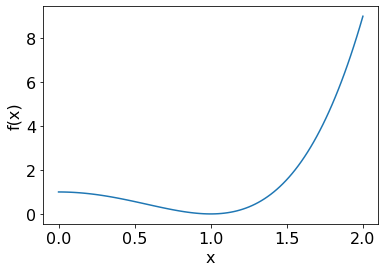

In [2]:
from numpy import linspace
import matplotlib.pyplot as plt 

# start and end points
a = 0.0
b = 2.0
points = 100

# Set up lists for plotting
y = []
x = linspace(a,b,points)

# generate the function values
for xi in x:
    val = xi**4.0-2*xi**2+1
    y.append(val)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

## Exercise 1.2 and 1.3

Change the example program to add a loop over the number of discretisation points and plot the value of the integral and/or the integration error as a function of integration points.

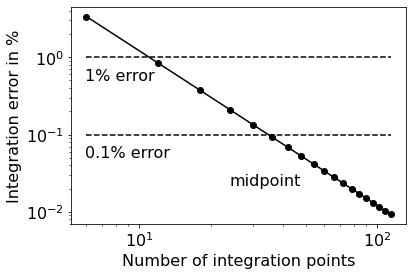

In [11]:
from numpy import linspace
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x):
    return x**4 - 2*x + 1
a = 0.0
b = 2.0
val = 4.4

# Set up lists for plotting
y = []
x = []
err1 = 1.0
err2 = 0.1

# define settings for convergence loop
step = 6
initial = 0
increments = 20

# convergence loop
N = initial
for i in range(1,increments):
    N = N+step
    h = (b-a)/N
    s = 0.0
    for k in range(1,N+1):
        s += f(a+(k-0.5)*h)     
    error = (val-h*s)/val*100
    y.append(error)
    x.append(N)

# Make the graph

plt.rc('font',size=16) # set the font size
plt.plot(x,y,"ko-")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of integration points')
plt.ylabel('Integration error in %')
plt.hlines(err1,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(err2,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.text(x[0]-0.1, err1-0.5, '1% error')
plt.text(x[0]-0.1, err2-0.05, '0.1% error')
plt.text(x[3], y[increments-4]+0.01, 'midpoint',color='k')

plt.show()

## Exercise 2.1 and 2.2

Change your integration program to the trapezoidal rule. Loop again over the number of discretisation points and plot the value of the integral and/or the integration error as a function of integration points.

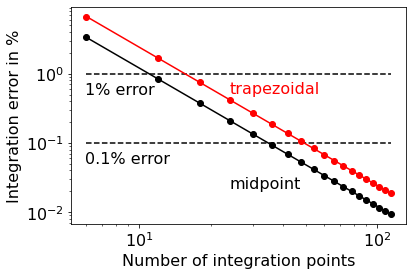

In [5]:
from numpy import linspace
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter

# define function, bounds and value of integral
def f(x):
    return x**4 - 2*x + 1
a = 0.0
b = 2.0
val = 4.4

# Set up lists for plotting
y = []
yt = []
x = []
err1 = 1.0
err2 = 0.1

# define settings for convergence loop
step = 6
initial = 0
increments = 20

# convergence loop
N = initial
for i in range(1,increments):
    N = N+step
    h = (b-a)/N
    s = 0.0
    st = 0.5*f(a) + 0.5*f(b)
    for k in range(1,N+1):
        s += f(a+(k-0.5)*h) 
    for k in range(1,N):
        st += f(a+k*h)
    error = abs((val-h*s)/val*100)
    errort = abs((val-h*st)/val*100)
    y.append(error)
    yt.append(errort)
    x.append(N)

# Make the graph

plt.rc('font',size=16) # set the font size
plt.plot(x,y,"ko-")
plt.plot(x,yt,"ro-")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of integration points')
plt.ylabel('Integration error in %')
plt.hlines(err1,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(err2,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.text(x[0]-0.1, err1-0.5, '1% error')
plt.text(x[0]-0.1, err2-0.05, '0.1% error')
plt.text(x[3], y[increments-4]+0.01, 'midpoint',color='k')
plt.text(x[3], yt[3]+0.1, 'trapezoidal',color='r')

plt.show()

## Exercise 3

1. Change your integration program to the Simpson's rule. Loop over the number of discretisation points. 
2. Plot the value of the integral and/or the integration error as a function of integration points.

## Talking points

1. What changes with the Simpson's rule?
2. How many points do you need for 1% accuracy and how many for 0.1% accuracy? 
3. How could we do even better?

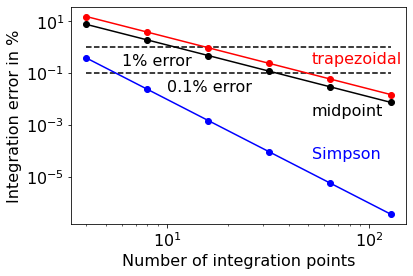

In [12]:
from numpy import linspace
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x):
    return x**4 - 2*x + 1
a = 0.0
b = 2.0
val = 4.4

# Set up lists for plotting
y = []
yt = []
ys = []
x = []
err1 = 1.0
err2 = 0.1

# define settings for convergence loop
factor = 2
initial = 2
increments = 7

# convergence loop
N = initial
for i in range(1,increments):
    N = N*factor
    h = (b-a)/N
    s = 0.0
    st = 0.5*f(a) + 0.5*f(b)
    ss = f(a) + f(b)
    for k in range(1,N+1):
        s += f(a+(k-0.5)*h) # midpoint integration
    for k in range(1,N):
        st += f(a+k*h)      # trapezoidal rule
    for k in range(1,N,2):  # Simpson's rule
        ss += 4*f(a+k*h)    
    for k in range(2,N,2):
        ss += 2*f(a+k*h)
    error = abs((val-h*s)/val*100) # compute errors
    errort = abs((val-h*st)/val*100)
    errors = abs((val-h*ss/3.0)/val*100)
    y.append(error) # collect values in arrays
    yt.append(errort)
    ys.append(errors)
    x.append(N)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y,"ko-")
plt.plot(x,yt,"ro-")
plt.plot(x,ys,"bo-")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of integration points')
plt.ylabel('Integration error in %')
plt.hlines(err1,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(err2,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.text(x[0]+2, err1-0.8, '1% error')
plt.text(x[1]+2, err2-0.08, '0.1% error')
plt.text(x[increments-4]+20, y[increments-4]-0.116, 'midpoint',color='k')
plt.text(x[increments-4]+20, yt[increments-4]-0.01, 'trapezoidal',color='r')
plt.text(x[increments-4]+20, ys[increments-4]-0.00004, 'Simpson',color='b')

plt.show()

## Exercise 4

The python file gaussxw.py is included in the lecture folder. It contains the routine gaussxw that generates the integration grid points and corresponding weights. It use is shown below.

1. Change your integration program to use Gauss-Legendre integration. Use $N=3$ integration points.
2. Test what happens when you increase the number of integration points.

## Talking points

1. What changes with Gauss-Legendre integration?
2. Do you still need to verify convergence?

In [2]:
from gaussxw import gaussxw

def f(x):
    return x**4 - 2*x + 1

N = 3
a = 0.0
b = 2.0

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

4.4000000000000075


## Bonus exercise 5

1. Plot the function $ f(x)=0.2 x^5 - 0.3 x^4.0+2.3 x^3-3.1 x^2 + 1.7 $.
2. Integrate $f(x)$ from -1.0 to 2.0 using both Gauss-Legendre integration and the Simpson's rule.
3. Define your own function to integrate.

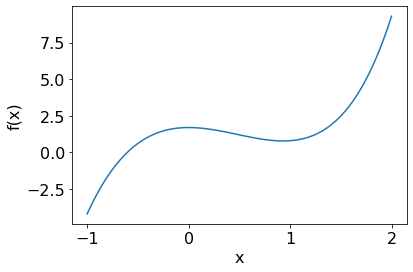

In [48]:
from numpy import linspace
import matplotlib.pyplot as plt 

# start and end points
a = -1.0
b = 2.0
points = 100

# Set up lists for plotting
y = []
x = linspace(a,b,points)

# generate the function values
for xi in x:
    val = 0.2*xi**5 - 0.3*xi**4.0+2.3*xi**3-3.1*xi**2 + 1.7
    y.append(val)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

In [52]:
from gaussxw import gaussxw

def f(x):
    return 0.2*x**5 - 0.3*x**4.0+2.3*x**3-3.1*x**2 + 1.7

N = 3
a = -1.0
b = 2.0

# Calculate the sample points and weights, then map them
# to the required integration domain
x,w = gaussxw(N)
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

# Perform the integration
s = 0.0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

4.545000000000005


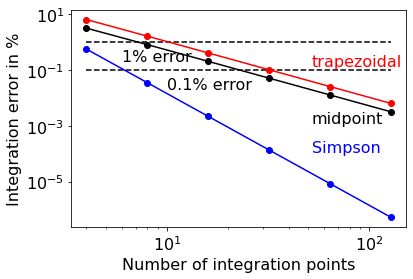

In [27]:
from numpy import linspace
import matplotlib.pyplot as plt 

# define function, bounds and value of integral
def f(x):
    return 0.2*x**5 - 0.3*x**4.0+2.3*x**3-3.1*x**2 + 1.7
a = -1.0
b = 2.0
val = 4.545

# Set up lists for plotting
y = []
yt = []
ys = []
x = []
err1 = 1.0
err2 = 0.1

# define settings for convergence loop
factor = 2
initial = 2
increments = 7

# convergence loop
N = initial
for i in range(1,increments):
    N = N*factor
    h = (b-a)/N
    s = 0.0
    st = 0.5*f(a) + 0.5*f(b)
    ss = f(a) + f(b)
    for k in range(1,N+1):
        s += f(a+(k-0.5)*h) # midpoint integration
    for k in range(1,N):
        st += f(a+k*h)      # trapezoidal rule
    for k in range(1,N,2):  # Simpson's rule
        ss += 4*f(a+k*h)    
    for k in range(2,N,2):
        ss += 2*f(a+k*h)
    error = abs((val-h*s)/val*100.) # compute errors
    errort = abs((val-h*st)/val*100.)
    errors = abs((val-h*ss/3.0)/val*100.)
    y.append(error) # collect values in arrays
    yt.append(errort)
    ys.append(errors)
    x.append(N)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(x,y,"ko-")
plt.plot(x,yt,"ro-")
plt.plot(x,ys,"bo-")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of integration points')
plt.ylabel('Integration error in %')
plt.hlines(err1,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.hlines(err2,x[0],x[increments-2],linestyles='dashed',colors='k')
plt.text(x[0]+2, err1-0.8, '1% error')
plt.text(x[1]+2, err2-0.08, '0.1% error')
plt.text(x[increments-4]+20, y[increments-4]-0.0495, 'midpoint',color='k')
plt.text(x[increments-4]+20, yt[increments-4]+0.04, 'trapezoidal',color='r')
plt.text(x[increments-4]+20, ys[increments-4]-0.00002, 'Simpson',color='b')

plt.show()